In [1]:
#!/usr/bin/env python3.6
# -*- coding: utf-8 -*-

In [2]:
# Imports
import sys
import joblib
import numpy as np
from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [3]:
#np.random.seed(20)
np.set_printoptions(threshold=sys.maxsize)

In [4]:
%matplotlib inline

In [5]:
%store -r X_footsteps_accelerations_absolute
%store -r Y_footsteps_accelerations_absolute
%store -r X_footsteps_continuous_absolute
%store -r Y_footsteps_continuous_absolute
X_motion = np.concatenate((X_footsteps_accelerations_absolute, X_footsteps_continuous_absolute))
Y_motion = np.concatenate((Y_footsteps_accelerations_absolute, Y_footsteps_continuous_absolute))
print(X_motion.shape)
print(Y_motion.shape)

(1562, 20)
(1562, 4)


# Multivariate Linear Regression (Foot prediction)

In [6]:
import sklearn
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [7]:
# Entries where FL/RR are swinging
idxs = np.where(X_motion[:, -2] == 1)[0]
X_motion_RR_swinging = X_motion[idxs]
Y_motion_RR_swinging = Y_motion[idxs]

## Predict RR foot -> x

In [8]:
X_motion_RR_swinging[0, :]

array([ 0.        ,  0.        ,  0.        ,  0.24316426,  0.12834719,
       -0.38366681,  0.23878607, -0.13193817, -0.36480507, -0.25856626,
        0.12253836, -0.36866394, -0.25985879, -0.12464122, -0.38309926,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ])

In [9]:
Y_motion_RR_swinging[0, :]

array([-0.00169894, -0.00981897, -0.00087816, -0.01051381])

### Linear Regression

In [11]:
# Input
X = np.hstack((X_motion_RR_swinging[:, -5:-2], # Previous motion command
               X_motion_RR_swinging[:, :3], # Current motion command
               X_motion_RR_swinging[:, 3:5], # FL (x,y) position
               X_motion_RR_swinging[:, 6:8], # FR (x,y) position
               X_motion_RR_swinging[:, 9:11], # RL (x,y) position
               X_motion_RR_swinging[:, 12:14])) # RR (x, y) position

# Target
Y = np.array([Y_motion_RR_swinging[:, 2]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True, random_state=100)

# Create the model
model_rr_relative_swinging_x = LinearRegression()

# Fit the model
model_rr_relative_swinging_x.fit(X_train, Y_train)

# Predict
predictions = model_rr_relative_swinging_x.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.9879825242299797
RMSE:  0.014604617389469199
The lowest error is:  4.2411301315326e-06
The highest error is:  0.057126462110508314
The avg. error is:  0.010598729920893177


In [12]:
model_rr_relative_swinging_x.coef_

array([[ 6.95139108e-02, -1.11022302e-16,  0.00000000e+00,
         2.02025576e-01, -3.05311332e-16, -3.33066907e-16,
        -4.76977358e-01, -6.90331502e-02,  6.54003083e-01,
         1.47679972e+00, -4.75345412e-01, -5.30164930e-01,
        -1.75380690e+00, -1.52964208e+00]])

In [13]:
model_rr_relative_swinging_x.intercept_

array([-0.55095271])

Text(0, 0.5, 'Predictions')

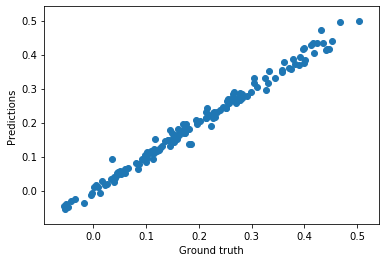

In [14]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [15]:
#%store model_rr_relative_swinging_x

In [16]:
#for idx, prediction in enumerate(predictions):
#    print(f'Start: {X_test[idx, 6]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [17]:
# Save model
#joblib.dump(model_rr_relative_swinging_x, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_rr_relative_swinging_x.sav")

### Predict RR foot -> y

In [18]:
# Input
X = np.hstack((X_motion_RR_swinging[:, -5:-2], # Previous motion command
               X_motion_RR_swinging[:, :3], # Current motion command
               X_motion_RR_swinging[:, 3:5], # FL (x,y) position
               X_motion_RR_swinging[:, 6:8], # FR (x,y) position
               X_motion_RR_swinging[:, 9:11], # RL (x,y) position
               X_motion_RR_swinging[:, 12:14])) # RR (x, y) position

# Target
Y = np.array([Y_motion_RR_swinging[:, 3]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True, random_state=100)

# Create the model
model_rr_relative_swinging_y = LinearRegression()

# Fit the model
model_rr_relative_swinging_y.fit(X_train, Y_train)

# Predict
predictions = model_rr_relative_swinging_y.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.23563531981161967
RMSE:  0.007241687402574393
The lowest error is:  0.00012184057425121929
The highest error is:  0.03426511310032535
The avg. error is:  0.005326811216731594


In [19]:
model_rr_relative_swinging_y.coef_

array([[-1.41321835e-02,  4.51028104e-17, -6.24500451e-17,
        -2.83917303e-03, -1.11022302e-16, -1.11022302e-16,
        -1.27478279e-01, -1.08764974e+00,  6.10081889e-02,
         5.25566231e-01, -5.53263506e-02,  5.00222634e-01,
         1.41043188e-02, -1.07131716e+00]])

In [20]:
model_rr_relative_swinging_y.intercept_

array([0.01381127])

Text(0, 0.5, 'Predictions')

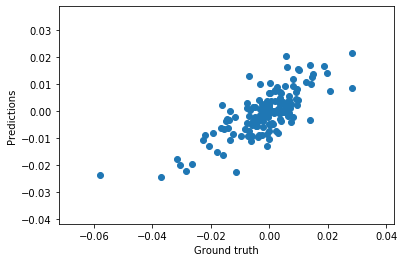

In [21]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [41]:
#for idx, prediction in enumerate(predictions):
#    print(f'Input: {X_test[idx]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')